# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-dirivng car recognizing the car in front.

## Get the data

The images we're working with are form the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However, it's modified it to only use two classes (pizza 🍕 & steak 🥩)

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up. 

In [1]:
import zipfile

!python -m wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()


Saved under pizza_steak.zip


## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project ... this usually means visualizing many samples of your data.

In [2]:
import os

# Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    if filenames == ['.DS_Store']:
        print(f'There are {len(dirnames)} directories in {dirpath}.')
    else:
        print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories in pizza_steak.
There are 2 directories in pizza_steak\test.
There are 0 directories and 250 images in pizza_steak\test\pizza.
There are 0 directories and 250 images in pizza_steak\test\steak.
There are 2 directories in pizza_steak\train.
There are 0 directories and 750 images in pizza_steak\train\pizza.
There are 0 directories and 750 images in pizza_steak\train\steak.


In [3]:
# Another way to find out how many images are in a file

num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [4]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names for the subdirectory
class_names = class_names[1:]

In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class
    
    # Get random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # Read in the iamge and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    plt.show()
    print(f'Image shape: {img.shape}') # Show the shape of the image
    return img

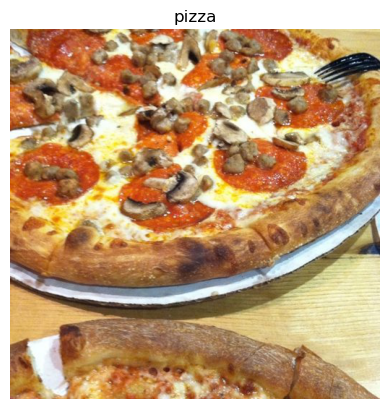

Image shape: (512, 512, 3)


In [6]:
img = view_random_image(target_dir='pizza_steak/train/',
                  target_class='pizza')

In [7]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[156, 135, 106],
        [154, 133, 104],
        [155, 131, 103],
        ...,
        [229, 215, 152],
        [226, 215, 151],
        [224, 213, 149]],

       [[159, 138, 109],
        [158, 137, 108],
        [159, 138, 107],
        ...,
        [229, 215, 150],
        [228, 214, 151],
        [226, 212, 149]],

       [[155, 134, 103],
        [156, 135, 104],
        [156, 135, 104],
        ...,
        [233, 219, 154],
        [232, 218, 153],
        [231, 217, 152]],

       ...,

       [[171, 104,  85],
        [171, 105,  83],
        [167, 103,  76],
        ...,
        [247, 229, 205],
        [255, 250, 227],
        [255, 252, 228]],

       [[171,  98,  91],
        [174, 104,  94],
        [174, 105,  90],
        ...,
        [204, 180, 156],
        [236, 214, 191],
        [244, 224, 200]],

       [[144,  68,  68],
        [154,  80,  77],
        [159,  86,  79],
        ...,
        [159, 128, 10

In [8]:
# View the image shape
img.shape # returns width, height, colour channels 

(512, 512, 3)

> 🔑 Note: As we've discussed before, many machine learning models, including NN prefer the values they work with to be between 0 and 1. Knowing this, on of the most common preprocessing steps for working with images is to **scale** (also referred to as normalized) their pixel values by dividing image arrays by 255 (since 255 is the maximum pixel value).

In [9]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.61176471, 0.52941176, 0.41568627],
        [0.60392157, 0.52156863, 0.40784314],
        [0.60784314, 0.51372549, 0.40392157],
        ...,
        [0.89803922, 0.84313725, 0.59607843],
        [0.88627451, 0.84313725, 0.59215686],
        [0.87843137, 0.83529412, 0.58431373]],

       [[0.62352941, 0.54117647, 0.42745098],
        [0.61960784, 0.5372549 , 0.42352941],
        [0.62352941, 0.54117647, 0.41960784],
        ...,
        [0.89803922, 0.84313725, 0.58823529],
        [0.89411765, 0.83921569, 0.59215686],
        [0.88627451, 0.83137255, 0.58431373]],

       [[0.60784314, 0.5254902 , 0.40392157],
        [0.61176471, 0.52941176, 0.40784314],
        [0.61176471, 0.52941176, 0.40784314],
        ...,
        [0.91372549, 0.85882353, 0.60392157],
        [0.90980392, 0.85490196, 0.6       ],
        [0.90588235, 0.85098039, 0.59607843]],

       ...,

       [[0.67058824, 0.40784314, 0.33333333],
        [0.67058824, 0.41176471, 0.3254902 ],
        [0.65490196, 0

## And end-to-end example
Let's build a convolutional NN to find patterns in our images, more specifically we need a way to :
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 & 1, also scaling/normalization )
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = './pizza_steak/train'
test_dir = './pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              batch_size = 32,
                                              target_size = (224, 224),
                                              class_mode= 'binary',
                                              seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size = 32,
                                              target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = 3,
                          activation = 'relu',
                          input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                             padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model 
history_1 = model_1.fit(train_data, 
                       epochs=5,
                       steps_per_epoch = len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 15s 208ms/step - loss: 0.6049 - accuracy: 0.6673 - val_loss: 0.4142 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4264 - accuracy: 0.8100 - val_loss: 0.3511 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3971 - accuracy: 0.8247 - val_loss: 0.3784 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3543 - accuracy: 0.8467 - val_loss: 0.3665 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3155 - accuracy: 0.8767 - val_loss: 0.2844 - val_accuracy: 0.8900


> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using GPU

In [11]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before 

This is to contrast the usefulness of CNN over images. Let's replicate the model we've built in the previous notebook to see if it works with our image data.

In [12]:
# Set random seed 

tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model

model_2.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']
               )

# Fit the model
history_2 = model_2.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 192ms/step - loss: 1.5522 - accuracy: 0.5120 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20 x more parameters than our CNN (model_1), model_2 performs terribly.. let's try to improve it

In [14]:
# Set random seed

tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile model 
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                       epochs = 5,
                       steps_per_epoch= len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 192ms/step - loss: 6.2348 - accuracy: 0.6080 - val_loss: 3.0191 - val_accuracy: 0.6280
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 1.5458 - accuracy: 0.7120 - val_loss: 1.0834 - val_accuracy: 0.7040
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 1.5448 - accuracy: 0.7007 - val_loss: 2.3974 - val_accuracy: 0.6860
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 1.0027 - accuracy: 0.7353 - val_loss: 0.7044 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.8717 - accuracy: 0.7420 - val_loss: 0.9804 - val_accuracy: 0.7400


In [15]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                9633856   
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 9,635,969
Trainable params: 9,635,969
Non-trainable params: 0
_________________________________________________________________


🔑**Note**: You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might think more is better. And lots it cases, it is. But in this case, the difference here is the two different styles of model we're using. Wherea series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

## Binary classification let's break it down.

1. Become one with the data  (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling / normalizing)
3. Create a model (start with a baseline)
4. Fit the model 
5. Evaluate the model
6. Adjust different parameters and impreove the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data



In [16]:
def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class
    
    # Get random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # Read in the iamge and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f'Image shape: {img.shape}') # Show the shape of the image
    return img
    
   

Image shape: (384, 512, 3)
Image shape: (512, 512, 3)


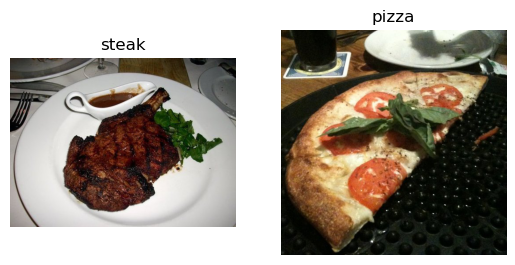

In [17]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')
plt.show()

### 2. Pre-process the data (prepare it for a model)

In [18]:
# Define directory dataset paths 
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**. 

A batch is a small subset of a dataset that the model looks during training. Rather than see 10K examples at one time, the model just might look at 32 images at the time. 

It does this for a couple of reasons:
1. 10K images (or more) might not fit into the memory of your processor (GPU).
2. Tryinh to learn the patterns in 10K images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health.. https://twitter.com/ylecun/status/989610208497360896?lang=en

In [19]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/225.)
test_datagen = ImageDataGenerator(rescale = 1/225.)

In [20]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, # Target directory of images
                                              target_size=(224, 224), # Target size of images (height, width)
                                              class_mode = 'binary', # type of data you're working with
                                              batch_size = 32) # Size of minibatches to lad data into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                            target_size = (224, 224),
                                            class_mode = 'binary',
                                            batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [21]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the 'next' batch of iamges labels in train data
len(images), len(labels)

(32, 32)

In [22]:
# How many batches are there
len(train_data), 1500/32

(47, 46.875)

In [23]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.53333336, 0.46222222, 0.39111114],
          [0.54222226, 0.48444447, 0.41333336],
          [0.5511111 , 0.49333334, 0.42222223],
          ...,
          [0.94222224, 0.8044445 , 0.5511111 ],
          [0.95555556, 0.83111113, 0.6088889 ],
          [0.9955556 , 0.8755556 , 0.6666667 ]],
 
         [[0.5777778 , 0.48444447, 0.4088889 ],
          [0.5733333 , 0.48000002, 0.40444446],
          [0.5822222 , 0.50222224, 0.41333336],
          ...,
          [0.9377778 , 0.8       , 0.5466667 ],
          [0.9377778 , 0.8044445 , 0.5733333 ],
          [0.95555556, 0.83111113, 0.6088889 ]],
 
         [[0.59555554, 0.48444447, 0.39555556],
          [0.6088889 , 0.4977778 , 0.4088889 ],
          [0.6088889 , 0.51111114, 0.4088889 ],
          ...,
          [0.9377778 , 0.7955556 , 0.54222226],
          [0.9377778 , 0.8       , 0.56      ],
          [0.9466667 , 0.81333333, 0.5822222 ]],
 
         ...,
 
         [[0.88      , 0.64      , 0.3288889 ],
          [0.88444

In [24]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that your setup when beginning a machine learning experiment and then you keep experimenting, you try to beat a baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works and your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem)

In [25]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [26]:
# Create the model (this will be our baseline a layer convolution neural network)

model_4 = Sequential([
    Conv2D(filters = 10, # filter is the number of sliding windows going across an input (higher = more complex model).
          kernel_size = 3, # the size of the sliding window going across an input
          strides = 1, # the size of the step the sliding window takes across an input
          padding = 'valid', # if 'same' output shape is same as input shape, if "valid" output shape get compress
          activation = 'relu',
          input_shape = (224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid') # output layer (working with binary classification so only 1 output neuron)
])

In [27]:
# Compile the model
model_4.compile(loss = 'binary_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

In [28]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [29]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [30]:
# Fit the model
history_4 = model_4.fit(train_data, # This is a combination of labels and sample data
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 0.7231 - accuracy: 0.6907 - val_loss: 0.4454 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4482 - accuracy: 0.8093 - val_loss: 0.4462 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3228 - accuracy: 0.8693 - val_loss: 0.5149 - val_accuracy: 0.7460
Epoch 4/5
47/47 [==============================] - 9s 187ms/step - loss: 0.1653 - accuracy: 0.9500 - val_loss: 0.4168 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.0680 - accuracy: 0.9813 - val_loss: 0.4750 - val_accuracy: 0.8340


### 5. Evaluating our model

It looks like our model learning something, let's evaluate it.

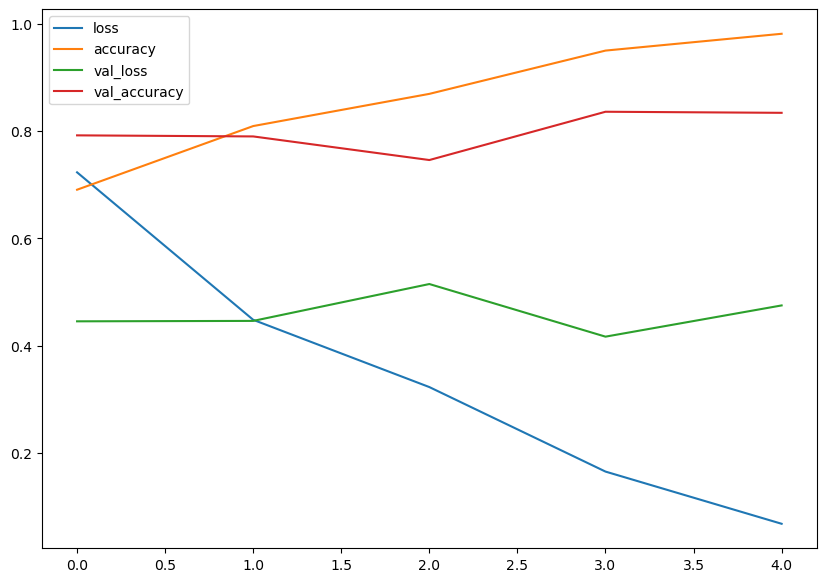

In [31]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7))
plt.show()

In [36]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    '''
    Returns separate loss curvs for training and validation metrics. 
    '''
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss'])) # how many epochs we train on
    
    # Plot loss
    plt.figure()
    plt.plot(epochs, loss, label = 'training_loss')
    plt.plot(epochs, val_loss, label = 'val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()
    
    # Plot Accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label = 'training_accuracy')
    plt.plot(epochs, val_accuracy, label = 'val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    
    plt.show()
    

> 🔑**Note:** When a model's **validation loss start to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize.

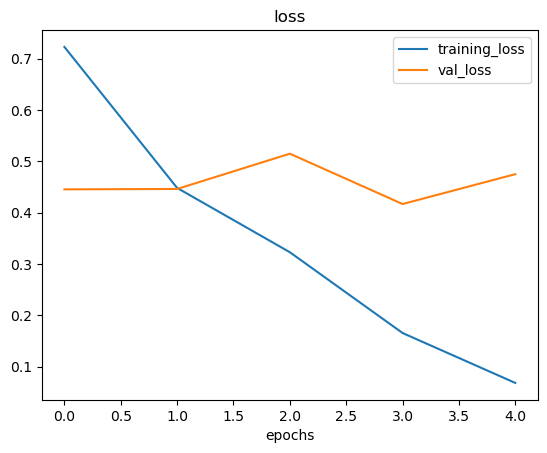

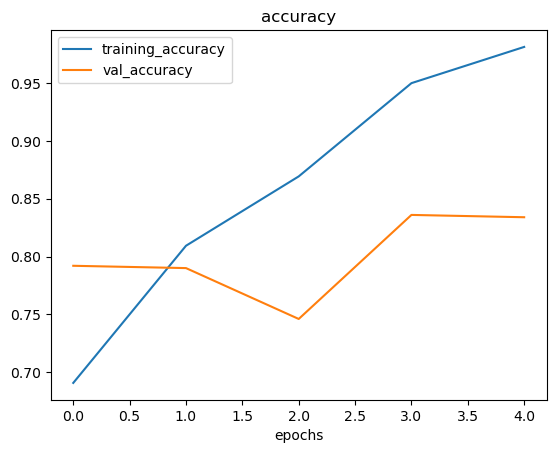

In [33]:
plot_loss_curves(history_4)

> 🔑**Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting. 

Ways to induce overfitting:
* Increase the number of conv layers (preferred)
* Increase the number of conv filters (preferred)
* Add another dense layer to the output of our flattened layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2d)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as *regularization*.


In [34]:
# Create a model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [35]:
# Compile the model
model_5.compile(loss = 'binary_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

In [36]:
# fit the model
history_5 = model_5.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6226 - accuracy: 0.6707 - val_loss: 0.4674 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 0.4872 - accuracy: 0.7920 - val_loss: 0.4105 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4176 - accuracy: 0.8167 - val_loss: 0.3789 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3916 - accuracy: 0.8253 - val_loss: 0.3611 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3651 - accuracy: 0.8460 - val_loss: 0.3217 - val_accuracy: 0.8660


In [37]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

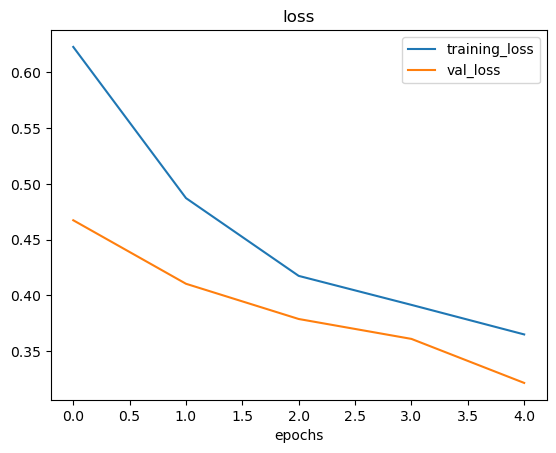

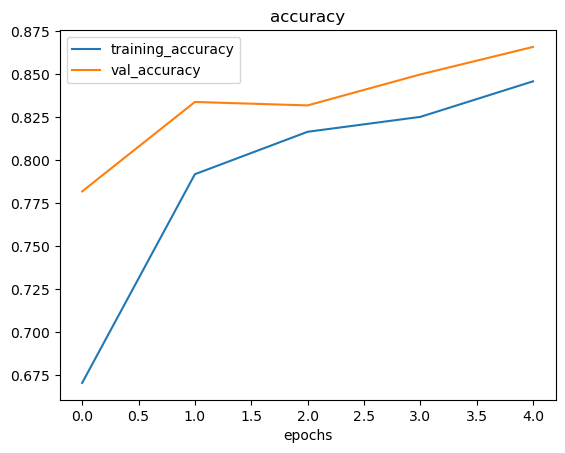

In [38]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [39]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2, # how much do you want to rotate an image?
                                            shear_range = 0.2, # how much do you want to shear an image?
                                            zoom_range = 0.2, # zoom in randomly 
                                            width_shift_range=0.2, # move your image around x-axis
                                            height_shift_range=0.2, # move your image around y-axis
                                            horizontal_flip = True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation
test_datagen = ImageDataGenerator(rescale = 1/255.)

> 🤔 **Question:** What is data augmentation? 

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [40]:
# Import data and augment it form training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print('Non-augmented training data')
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
# Create non-augmented test data batches
print('Non-augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the train data. Using `ImageDataGenerator` build-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model. 

Finally .. let's visualize some augmented data!

In [41]:
# Get a sample augmented data batches
images, labels =  train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels are not augmented

showing image number: 6


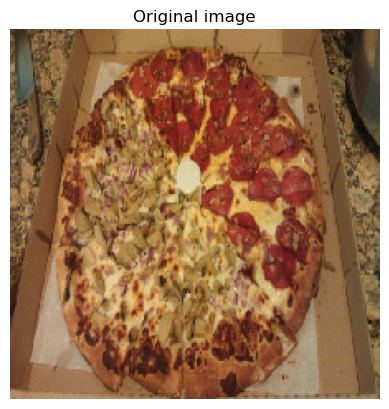

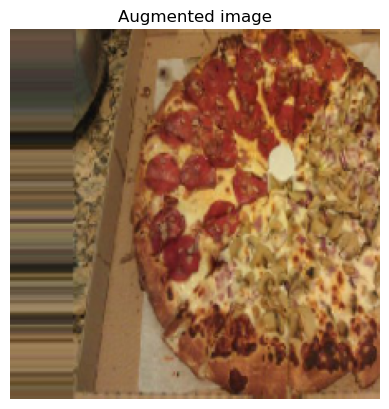

In [42]:
# Show the original image and augmented image
import random
random_number = random.randint(0, 32) #our batches size are 32..
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.show()
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)
plt.show()

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data

In [43]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model_6.compile(loss = 'binary_crossentropy',
               optimizer= Adam(),
               metrics = ['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                       epochs = 5,
                       batch_size = 32,
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 475ms/step - loss: 0.7062 - accuracy: 0.5013 - val_loss: 0.6833 - val_accuracy: 0.5320
Epoch 2/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6878 - accuracy: 0.5600 - val_loss: 0.6673 - val_accuracy: 0.5540
Epoch 3/5
47/47 [==============================] - 22s 471ms/step - loss: 0.7043 - accuracy: 0.5273 - val_loss: 0.6818 - val_accuracy: 0.6920
Epoch 4/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6782 - accuracy: 0.6020 - val_loss: 0.6599 - val_accuracy: 0.5640
Epoch 5/5
47/47 [==============================] - 22s 470ms/step - loss: 0.6828 - accuracy: 0.5880 - val_loss: 0.6705 - val_accuracy: 0.5960


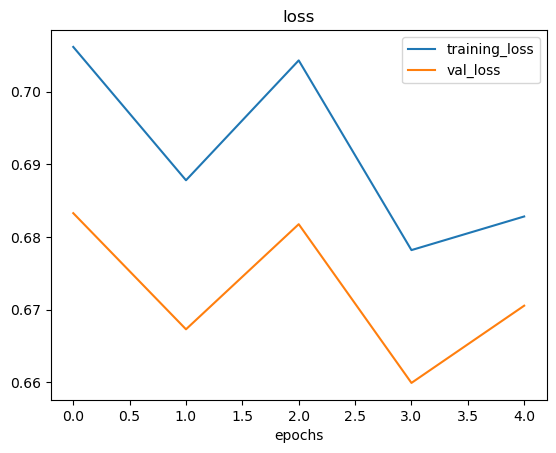

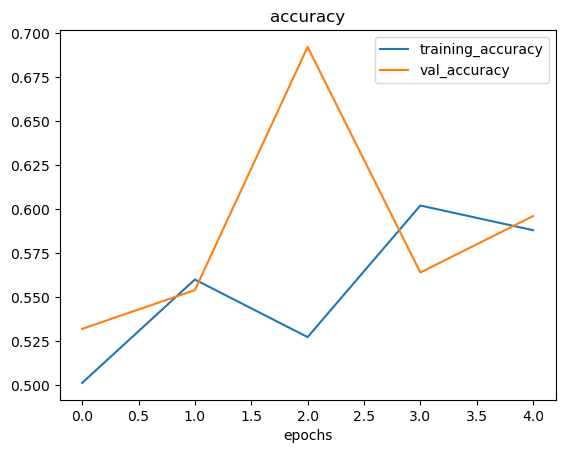

In [44]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before on it and see what happens.)

In [45]:
# Import data and augment it and shuffle from training directory
print('Augmented training data')
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=True) # shuffle data this time

Augmented training data
Found 1500 images belonging to 2 classes.


In [46]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model_7.compile(loss = 'binary_crossentropy',
               optimizer= Adam(),
               metrics = ['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffle, #we're fitting on augmented and shuffled data now
                       epochs = 5,
                       batch_size = 32,
                       steps_per_epoch = len(train_data_augmented_shuffle),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 474ms/step - loss: 0.6822 - accuracy: 0.5480 - val_loss: 0.6180 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 22s 471ms/step - loss: 0.5697 - accuracy: 0.7213 - val_loss: 0.4212 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 22s 471ms/step - loss: 0.5227 - accuracy: 0.7427 - val_loss: 0.3883 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5052 - accuracy: 0.7593 - val_loss: 0.4568 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 22s 470ms/step - loss: 0.4747 - accuracy: 0.7847 - val_loss: 0.3670 - val_accuracy: 0.8380


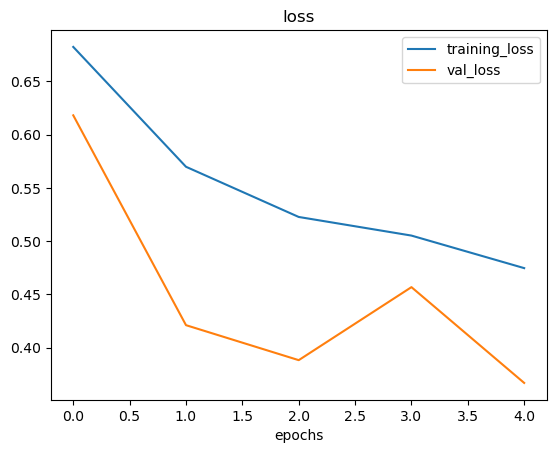

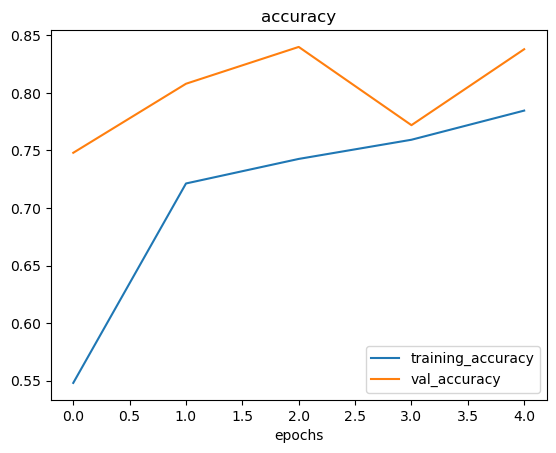

In [47]:
# Plot loss curves
plot_loss_curves(history_7)

>🔑 **Note:** When shuffling training data, the model gets exposed to all different kind of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2d`/ `MaxPool2d` layers)
* Increase the number of filters in each convolution layer (e.g. from 10 to 32 or even 64).
* Train for longer (more epochs).
* Find an ideal learning rate.
* Get more data (give the model more opportunities to learn)
* Use **transfer learning**  to leverage what another image model has learn and adjust it for our own use case. 

## Making a prediction with our trained model on our own custom data

In [48]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


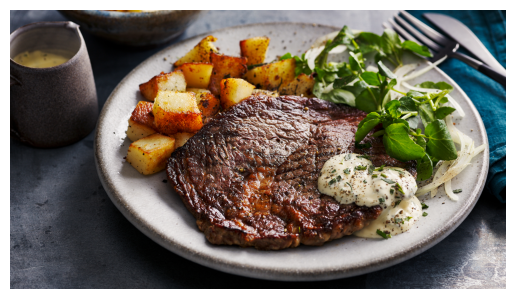

In [54]:
# View our example images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
steak = mpimg.imread('./images/steak.jpg')
plt.imshow(steak)
plt.axis(False)
plt.show()

In [57]:
# Check the shape of our image
steak.shape

(900, 1600, 3)

> 🔑**Note:** When you train a NN and you want to make a prediction with it on your own custom data, it's important than your custom data(or new data) is preprocessed into the same format as the data your model was trained on.

In [63]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape = 224):
    '''
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape,
    img_shape, colour_channels)
    '''
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size = [img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = tf.math.divide(img, 255.)
    return img

steak = load_and_prep_image('./images/steak.jpg')
steak.shape

TensorShape([224, 224, 3])

In [66]:
# Load in and preprocess our custom image
pred = model_7.predict(tf.expand_dims(steak, axis = 0))
pred

array([[0.87946475]], dtype=float32)

In [77]:
pred[0][0]

0.87946475

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the iamge as well as the model's prediction

In [65]:
# Remind ourself of our class names
class_names

array(['pizza', 'steak'], dtype='<U9')

In [68]:
# we can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [84]:
def pred_and_plot(model, filename, class_names = class_names):
    '''
    Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the tittle
    '''
    # Import the target image and pre processed it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis = 0))
    
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]
    
    # Plot the image and predicted class
    plt.imshow(img)
    if pred_class == 'steak':
        plt.title(f'Prediction: {pred_class}, with {pred[0][0]:.1%} probability')
    else:
        plt.title(f'Prediction: {pred_class}, with {1-pred[0][0]:.1%} probability')
    plt.axis(False)
    plt.show()

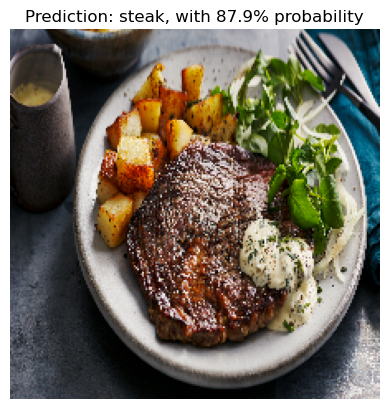

In [85]:
# Test our model on a custom image
pred_and_plot(model_7, './images/steak.jpg')

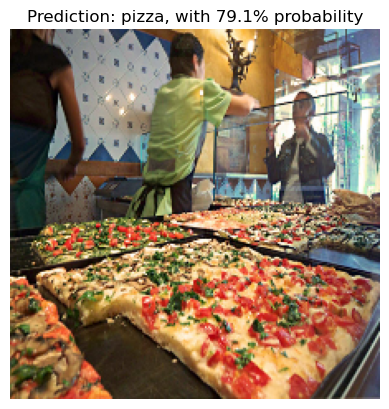

In [86]:
pred_and_plot(model_7, './images/pizza.jpg')

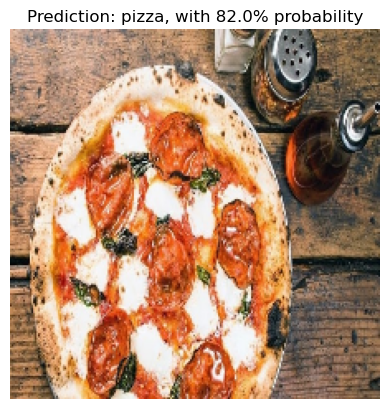

In [88]:
pred_and_plot(model_7, './images/pizza_2.jpg')

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with 10 classes of food (multi-class classification)

1. Become one with the data
2. PreProcess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline / reduce overffiting)
7. Repeat until satisfied

### 1. Import and become one with the data

In [1]:
import zipfile

!python -m wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip                 


Saved under 10_food_classes_all_data.zip


In [2]:
# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
import os 
# Walk through 10 classes of food image data

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} .')

There are 2 directories and 0 images in 10_food_classes_all_data .
There are 10 directories and 0 images in 10_food_classes_all_data\test .
There are 0 directories and 250 images in 10_food_classes_all_data\test\chicken_curry .
There are 0 directories and 250 images in 10_food_classes_all_data\test\chicken_wings .
There are 0 directories and 250 images in 10_food_classes_all_data\test\fried_rice .
There are 0 directories and 250 images in 10_food_classes_all_data\test\grilled_salmon .
There are 0 directories and 250 images in 10_food_classes_all_data\test\hamburger .
There are 0 directories and 250 images in 10_food_classes_all_data\test\ice_cream .
There are 0 directories and 250 images in 10_food_classes_all_data\test\pizza .
There are 0 directories and 250 images in 10_food_classes_all_data\test\ramen .
There are 0 directories and 250 images in 10_food_classes_all_data\test\steak .
There are 0 directories and 250 images in 10_food_classes_all_data\test\sushi .
There are 10 directori

In [19]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [5]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


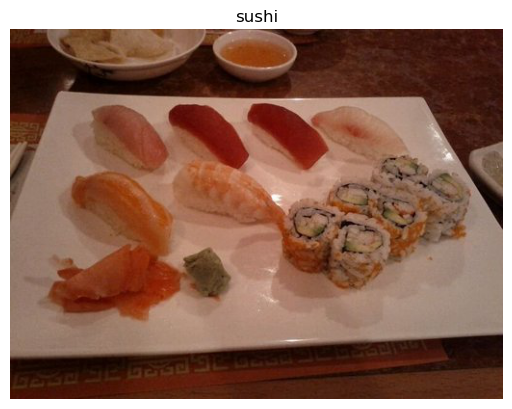

Image shape: (384, 512, 3)


In [16]:
# Visualize, visualize, visualize
import random 
img = view_random_image(target_dir=train_dir,
                       target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/225.)
test_datagen = ImageDataGenerator(rescale = 1/225.)

# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, # Target directory of images
                                              target_size=(224, 224), # Target size of images (height, width)
                                              class_mode = 'categorical', # type of data you're working with
                                              batch_size = 32) # Size of minibatches to lad data into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                            target_size = (224, 224),
                                            class_mode = 'categorical',
                                            batch_size = 32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem?

In [26]:
# Make the creating of our model a little easier
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [39]:
# Create our model 
model_8 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
          name = 'conv_1_1',
          input_shape=(224, 224, 3)),
    Activation(activation = 'relu', name = 'relu_1_1'),
    Conv2D(10, 3, name='conv_1_2'),
    Activation(activation = 'relu', name = 'relu_1_2'),
    MaxPool2D(2, name = 'max_pool_1'),
    Conv2D(10, 3, name='conv_2_1'),
    Activation(activation = 'relu', name = 'relu_2_1'),
    Conv2D(10, 3, name='conv_2_2'),
    Activation(activation = 'relu', name = 'relu_2_2'),
    MaxPool2D(2, name ='max_pool_2'),
    Flatten(),
    Dense(10, activation = 'softmax') # changed to have 10 outputs neurons and use the softmax activation
])

In [40]:
# Compile model
model_8.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer= Adam(),
               metrics= ['accuracy'])

In [41]:
# Fit our model
history_8 = model_8.fit(train_data, 
            batch_size = 32,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_batch_size = len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 183ms/step - loss: 2.1161 - accuracy: 0.2389 - val_loss: 1.9555 - val_accuracy: 0.3136
Epoch 2/5
235/235 [==============================] - 42s 180ms/step - loss: 1.8309 - accuracy: 0.3677 - val_loss: 1.8807 - val_accuracy: 0.3344
Epoch 3/5
235/235 [==============================] - 43s 182ms/step - loss: 1.5557 - accuracy: 0.4795 - val_loss: 1.9857 - val_accuracy: 0.3444
Epoch 4/5
235/235 [==============================] - 43s 185ms/step - loss: 1.0488 - accuracy: 0.6495 - val_loss: 2.2883 - val_accuracy: 0.3188
Epoch 5/5
235/235 [==============================] - 46s 195ms/step - loss: 0.4746 - accuracy: 0.8540 - val_loss: 3.0377 - val_accuracy: 0.2960


### 5. Evaluate the model

In [37]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 148ms/step - loss: 3.8338 - accuracy: 0.2788


[3.8337819576263428, 0.27880001068115234]

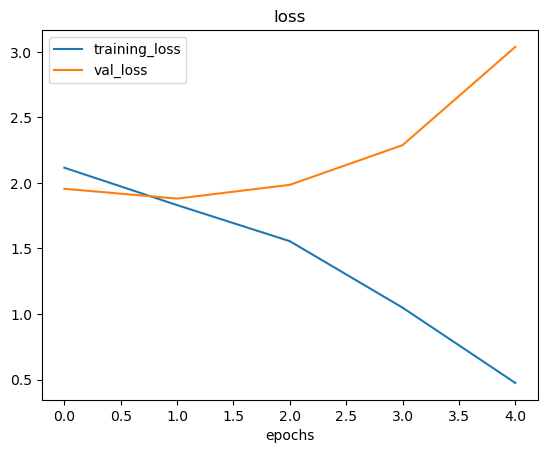

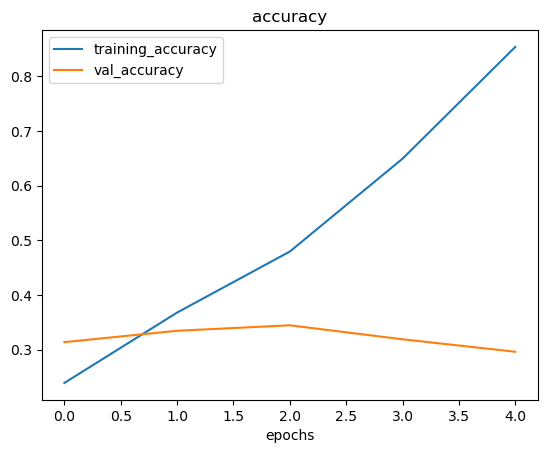

In [42]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well.. it seems our model is **overfitting** the training set quite badly ... in other words, it's getting great results on the traning data but fails to generalize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on training data, it's clear our model is learning something..

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify the model is to: reduce # of layers or reduce # of hidden units in layers (in this case filters)
* **Use data augmentation** - data augmentation manipulates traning data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on a similar data to your own and allows you to use those patterns on your own dataset.

In [51]:
# How about we try to simplify our model first?
# Let's try to remove 2 conv layers...

model_9 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = 'softmax')
])

model_9.compile(loss = 'categorical_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                       epochs = 5,
                       steps_per_epoch=len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 180ms/step - loss: 2.1205 - accuracy: 0.2391 - val_loss: 1.9447 - val_accuracy: 0.3108
Epoch 2/5
235/235 [==============================] - 42s 177ms/step - loss: 1.7632 - accuracy: 0.3988 - val_loss: 1.8596 - val_accuracy: 0.3708
Epoch 3/5
235/235 [==============================] - 42s 178ms/step - loss: 1.3123 - accuracy: 0.5776 - val_loss: 1.8997 - val_accuracy: 0.3688
Epoch 4/5
235/235 [==============================] - 42s 178ms/step - loss: 0.7549 - accuracy: 0.7748 - val_loss: 2.1958 - val_accuracy: 0.3380
Epoch 5/5
235/235 [==============================] - 42s 178ms/step - loss: 0.3775 - accuracy: 0.9040 - val_loss: 2.7050 - val_accuracy: 0.3056


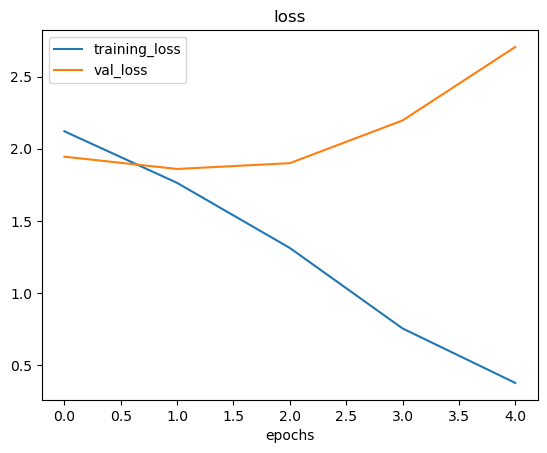

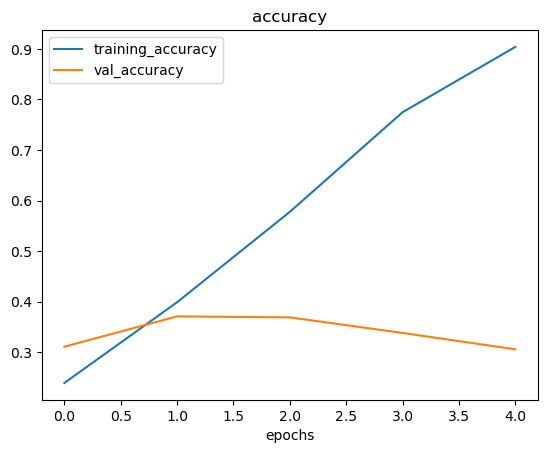

In [52]:
# Checkout the loss curves of model_10
plot_loss_curves(history_9)

In [53]:
model_9.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

In [54]:
model_8.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1_1 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
relu_1_1 (Activation)        (None, 222, 222, 10)      0         
_________________________________________________________________
conv_1_2 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
relu_1_2 (Activation)        (None, 220, 220, 10)      0         
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 110, 110, 10)      0         
_________________________________________________________________
conv_2_1 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
relu_2_1 (Activation)        (None, 108, 108, 10)     

Looks like our "simplifying the model" experiment didn't work... the accuracy went donw and overfitted.
How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's result by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [70]:
# Create and augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                         rotation_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [71]:
# Let's create another model but this time we'll fit it on the augmented training data 
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setups as previous models)
model_10.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [72]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                         epochs = 5,
                         steps_per_epoch=len(train_data_augmented),
                         validation_data=test_data,
                         validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 126s 533ms/step - loss: 2.2593 - accuracy: 0.1469 - val_loss: 2.1647 - val_accuracy: 0.2000
Epoch 2/5
235/235 [==============================] - 139s 593ms/step - loss: 2.1645 - accuracy: 0.1959 - val_loss: 2.0742 - val_accuracy: 0.2456
Epoch 3/5
235/235 [==============================] - 127s 541ms/step - loss: 2.0935 - accuracy: 0.2455 - val_loss: 1.9568 - val_accuracy: 0.3064
Epoch 4/5
235/235 [==============================] - 123s 525ms/step - loss: 2.0337 - accuracy: 0.2779 - val_loss: 1.8624 - val_accuracy: 0.3516
Epoch 5/5
235/235 [==============================] - 128s 546ms/step - loss: 2.0007 - accuracy: 0.2957 - val_loss: 1.8335 - val_accuracy: 0.3660


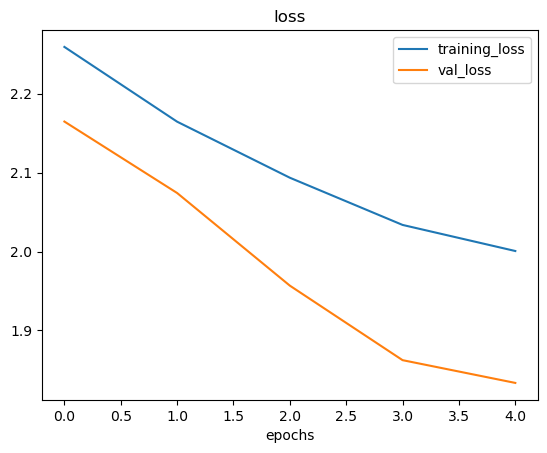

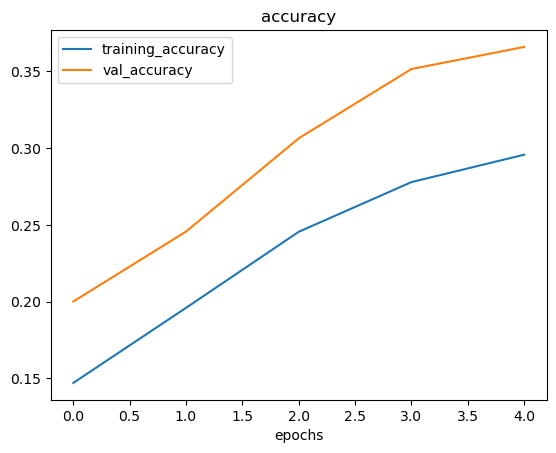

In [73]:
# Check out our model trained on augmented data's loss curve
plot_loss_curves(history_10)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements 

### 7. Repeat until satisfied

We could keep going here ... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy

How?

By running lots of experiments, namely:
- Restructuring our model's architecture (increasing layers/hidden units).
- Adjust the learning rate.
- Try different methods of data augmentation (adjust hyperparameters in our ImageDataGenerator instance).
- training for longer (e.g. traning for 10 epochs).
- Try **transfer learning**

### Making a prediction with our train model

Let's use our trained model to make some predictions on our own custom images!

In [75]:
# remind ourselves of the classes our model is trained on 
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [80]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape = 224):
    '''
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape,
    img_shape, colour_channels)
    '''
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size = [img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = tf.math.divide(img, 255.)
    return img

In [84]:
# Reconfig pred_and_plot function to 
def pred_and_plot(model, filename, class_names = class_names):
    '''
    Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the tittle
    '''
    # Import the target image and pre processed it
    img = load_and_prep_image(filename)
    
    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis = 0))
    
    # Add in logic for multi-class & get pred_class name
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred))]
    
    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f'Prediction: {pred_class}')
    plt.axis(False)
    plt.show()

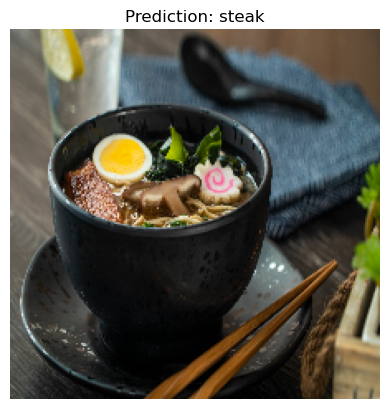

In [85]:
pred_and_plot(model=model_10,
             filename = './images/ramen.jpg',
             class_names= class_names)

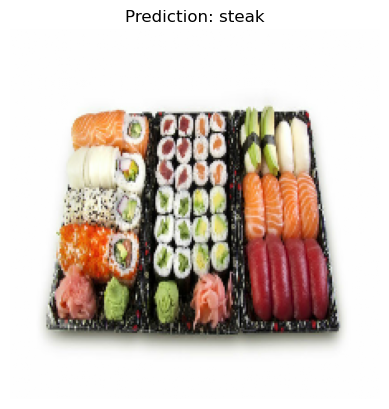

In [86]:
pred_and_plot(model=model_10,
             filename = './images/sushi.jpg',
             class_names= class_names)

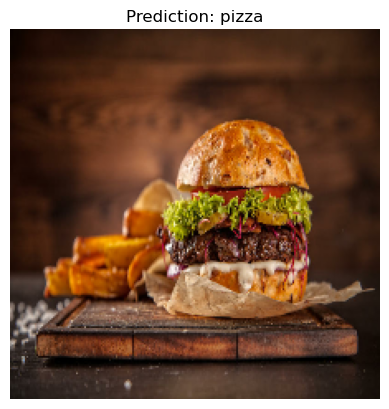

In [87]:
pred_and_plot(model=model_10,
             filename = './images/hamburguer.jpg',
             class_names= class_names)

Looks like our model didn't perform very well on our custom images but this is because it only achieve ~36% accuracy on the test data. So we can expect it to function quite poorly on other unseen data. 

## Saving and loading our model

In [88]:
# Save a model
model_10.save('saved_trained_model_10')

INFO:tensorflow:Assets written to: saved_trained_model_10\assets


In [89]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model('saved_trained_model_10')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 14s 169ms/step - loss: 1.8335 - accuracy: 0.3660


[1.8335208892822266, 0.3659999966621399]

In [90]:
# Compare our loaded model to our existing model
model_10.evaluate(test_data)

79/79 [==============================] - 12s 156ms/step - loss: 1.8335 - accuracy: 0.3660


[1.8335211277008057, 0.3659999966621399]